# Type 1 transition 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from tyssue import Sheet, SheetGeometry, config
# What we're here for
from tyssue.topology.sheet_topology import type1_transition

## model and solver
from tyssue.dynamics.sheet_vertex_model import SheetModel
from tyssue.solvers.sheet_vertex_solver import Solver
from tyssue.dynamics.sheet_isotropic_model import isotropic_relax

# 2D plotting
from tyssue.draw.plt_draw import sheet_view, quick_edge_draw
import tyssue.draw.plt_draw as draw
#I/O
from tyssue.io import hdf5
plt.style.use('bmh')

![Type 1 transition](../../doc/illus/t1_transition.png)

Reseting datasets values with new specs


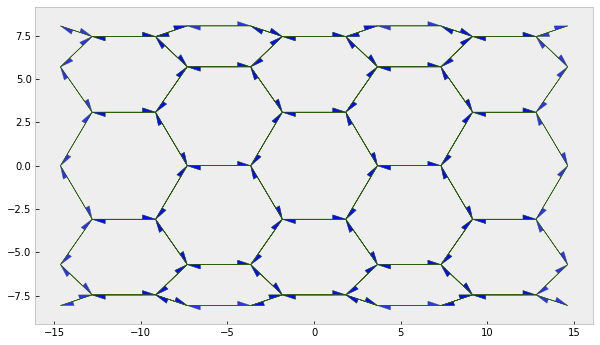

In [2]:
h5store = '../examples/small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store,
                              data_names=['face', 'vert', 'edge'])
specs = config.geometry.cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)


SheetGeometry.update_all(sheet)

nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = SheetModel.dimensionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        }
    }

sheet.get_opposite()
active_edges = (sheet.edge_df['opposite'] > -1).astype(bool)
active_verts = set(sheet.edge_df[active_edges]['srce'])
sheet.vert_df.is_active = 0
sheet.vert_df.loc[active_verts, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'],
                     edge={'head_width': 0.5},
                     vert={'visible': False})
fig.set_size_inches(10, 6)


True


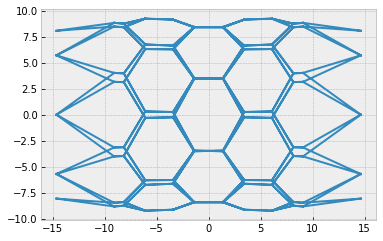

In [3]:

res = Solver.find_energy_min(sheet, SheetGeometry, SheetModel, pos_idx=active_verts, 
                             **solver_settings)
print(res['success'])
fig, ax = quick_edge_draw(sheet, ['z', 'x'])

In [4]:
type1_transition(sheet, 44)
SheetGeometry.update_all(sheet)
sheet.validate()


True

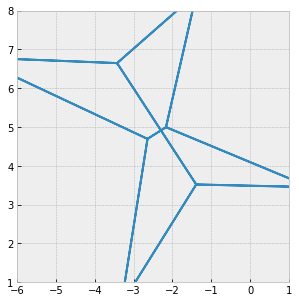

In [5]:

fig, ax = quick_edge_draw(sheet, ['z', 'x'])

ax.set_ylim(1, 8)
ax.set_xlim(-6, 1)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


True


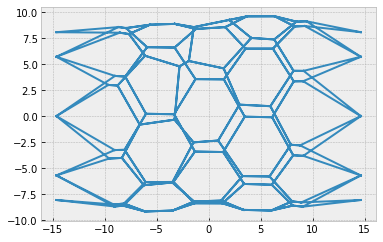

In [6]:
settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-6},
        }
    }


res = Solver.find_energy_min(sheet, SheetGeometry,
                             SheetModel, **settings)
print(res['success'])
fig, ax = quick_edge_draw(sheet, ['z', 'x'])

In [7]:
sheet.validate()

True

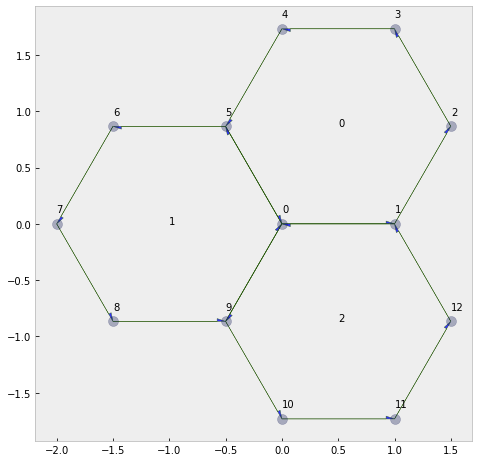

In [8]:
from tyssue.generation import three_faces_sheet

sheet = Sheet('3f', *three_faces_sheet())
SheetGeometry.update_all(sheet)
fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)

for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)
for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)



In [9]:
%pdb

Automatic pdb calling has been turned ON


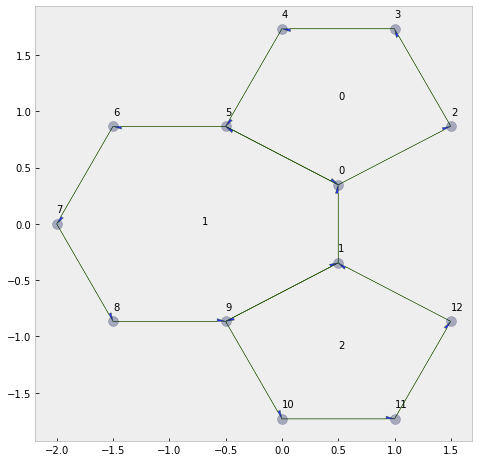

In [10]:

type1_transition(sheet, 0, epsilon=0.4)
#sheet.sanitize()

SheetGeometry.update_all(sheet)

fig, ax = sheet_view(sheet, edge={'head_width': 0.05})
fig.set_size_inches(8, 8)
for face, data in sheet.face_df.iterrows():
    ax.text(data.x, data.y, face)

for vert, data in sheet.vert_df.iterrows():
    ax.text(data.x, data.y+0.1, vert)

In [11]:
sheet.edge_df

,srce,trgt,face,dx,dy,dz,nx,ny,nz,length,sub_area,sub_vol
edge,,,,,,,,,,,,
1,0,2,0,1.0,0.5196,0.0,-0.0,0.0,0.762080,1.126936,0.381040,-1.524160
2,2,3,0,-0.5,0.8660,0.0,-0.0,-0.0,0.744760,0.999978,0.372380,-1.489520
3,3,4,0,-1.0,0.0000,0.0,0.0,-0.0,0.623520,1.000000,0.311760,-1.247040
4,4,5,0,-0.5,-0.8660,0.0,0.0,0.0,0.744760,0.999978,0.372380,-1.489520
5,5,0,0,1.0,-0.5196,0.0,0.0,0.0,0.762080,1.126936,0.381040,-1.524160
6,0,5,1,-1.0,0.5196,0.0,0.0,-0.0,0.977343,1.126936,0.488671,-1.954686
7,5,6,1,-1.0,0.0000,0.0,0.0,-0.0,0.866000,1.000000,0.433000,-1.732000
8,6,7,1,-0.5,-0.8660,0.0,0.0,0.0,1.113429,0.999978,0.556714,-2.226857
9,7,8,1,0.5,-0.8660,0.0,0.0,0.0,1.113429,0.999978,0.556714,-2.226857


In [12]:
type1_transition(sheet, 17)

KeyError: 'the label [-1] is not in the [index]'

> /home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py(1501)error()
   1499                 raise KeyError(u"the label [{key}] is not in the [{axis}]"
   1500                                .format(key=key,
-> 1501                                        axis=self.obj._get_axis_name(axis)))
   1502 
   1503             try:

ipdb> c
